## 사이킷런으로 수행하는 타이타닉 생존자 예측

* 캐글에서 제공하는 타이타닉 탑승자 데이터 기반으로
* 생존자 예측을 사이킷런으로 수행

* 타이타닉 생존자 데이터
    - 머신러닝에 입문하는 데이터 분석가/과학자를 위한 기초 예제로 제공
    - 많은 캐글 이용자가 자신의 방법으로 타이타닉 생존자 예측을 수행하고
    - 수행 방법을 캐글에 공유

* 캐글 : 데이터 분석 오픈 포탈
    - 세계적인 ML 기반 분석 대회를 온라인 상에서 주관
    
캐글사이트 : https://www.kaggle.com/c/titanic/data


**사이킷런으로 수행하는 타이타닉 생존자 예측 과정**
* 데이터 정보 확인
* 데이터 가공 (전처리)
    - Null 값 처리
    - Cabin 값 조정
    - 생존자 파악 (성별 / 객실등급별 / 연령별)
    - 레이블 인코딩
    - 모든 가공 내역을 함수로 작성
* 생존자 예측 프로세스
    - 클래스 결정값 데이터 세트 만들기
    - 학습 /테스트 데이터 세트 분리 (20%)
    - 예측 수행
    - 교차 검증

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

#그래프 패키지 
import matplotlib.pyplot as plt 
%matplotlib inline 
# 한글 문제 해결
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')# 한글 문제 해결
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')


# 동시 출력
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
titanic_df = pd.read_csv('./data/titanic_train.csv')

In [3]:
titanic_df.shape
titanic_df.head()

(891, 12)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### column 의미
* Passengerid: 탑승자 데이터 일련번호
* survived: 생존 여부, 0 = 사망, 1 = 생존
* Pclass: 티켓의 선실 등급, 1 = 일등석, 2 = 이등석, 3 = 삼등석
* sex: 탑승자 성별
* name: 탑승자 이름
* Age: 탑승자 나이
* sibsp: 같이 탑승한 형제자매 또는 배우자 인원수
* parch: 같이 탑승한 부모님 또는 어린이 인원수
* ticket: 티켓 번호
* fare: 요금
* cabin: 선실 번호
* embarked: 중간 정착 항구 C = Cherbourg, Q = Queenstown, S = Southampton


In [4]:
## 데이터 양 확인
titanic_df.shape
# 891 row와 12 종류 데이터 존재

(891, 12)

In [5]:
## 데이터 타입 확인
print('\n ### train 데이터 정보 ###  \n')
print(titanic_df.info())
## 891이 안되는 값은 null 값을 포함하고 있음


 ### train 데이터 정보 ###  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


- Age : 714개 (Null값(NaN): 177개)
- Cabin : 204개 (Null값(NaN): 687개)
- Embarked : 889개 (Null값(NaN): 2개)

#### Tip) object type

- df에서 문자열이 object로 표시가 됨
    - 문자열(String)은 길이 제한이 없어야 함
    - numpy의 String type은 길이 제한을 갖고 있음
    - pandas는 numpy를 기반을 만들어진 구조
        - 구분하기 위해 object 타입으로 명기

### 데이터 전처리

#### 결측 파악/처리

In [6]:
# T/F 로 결측치 확인
titanic_df['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [7]:
# null 갯수 확인
titanic_df['Age'].isnull().sum()
titanic_df['Cabin'].isnull().sum()
titanic_df['Embarked'].isnull().sum()

177

687

2

### NULL 컬럼들에 대한 처리

- 사이킷 머신러닝 알고리즘은 Null 값을 허용하지 않으므로
- Null 값을 어떻게 처리할지 결정
- DataFrame()의 fillna() 메서드를 사용해서 
- Null 값을 평균 또는 고정 값으로 변경
- Age : 평균 나이로 변경
- 나머지 칼럼 : 'N'으로 변경

In [8]:
## Null 처리 주의사항
titanic_df['Age'].mean() # 평규 나이 29세 많기 때문에 target 분포에 영향을 미칠 수 있음

29.69911764705882

In [9]:
titanic_df['Age'].fillna(float(titanic_df['Age'].mean()), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna("N", inplace=True)

# 모든 칼럼의 Null 값을 합산해서 Null 값이 없는지 확인
print('각 칼럼의 Null 값 갯수 ',titanic_df.isnull().sum())
print('데이터 세트 Null 값 갯수 ',titanic_df.isnull().sum().sum())

각 칼럼의 Null 값 갯수  PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
데이터 세트 Null 값 갯수  0


### 문자열 변수(피처) 빈도 분포 확인 : value_counts()

In [23]:
# 문자열 피처 (Sex, Cabin, Embarked) 값 분류 확인
print('Sex분포: \n', titanic_df['Sex'].value_counts())
print('\nCabin분포: \n', titanic_df['Cabin'].value_counts())
print('\nEmbarked분포: \n', titanic_df['Embarked'].value_counts())

Sex분포: 
 male      577
female    314
Name: Sex, dtype: int64

Cabin분포: 
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
F2               3
              ... 
A20              1
E34              1
A24              1
A6               1
F E69            1
Name: Cabin, Length: 148, dtype: int64

Embarked분포: 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


**문자열 변수 Cabin 값 변경**

In [26]:
# Cabin 컬럼 값에서 첫번쨰 문자만 추출\
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

# 선실등급 별 개수 확인
titanic_df['Cabin'].value_counts()


0    N
1    C
2    N
Name: Cabin, dtype: object


N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

### EDA

- 여러 가지 모듈이나 알고리즘을 적용해서 예측 수행전에 데이터 탐색
    - 어떤 유형(특징)의 승객이 생존확률이 높았는지 확익
    - 성별 특성에 따른 생존자수 비교
    - 성별이 생존확률에 영향을 미쳤는지 확인

In [29]:
# 성별(sex) 분포 확인
titanic_df.groupby('Sex')['Sex'].count() # 남성 탑승자가 많음

# 생존(Survived) 분포 확인
titanic_df.groupby('Survived')['Survived'].count()

Sex
female    314
male      577
Name: Sex, dtype: int64

Survived
0    549
1    342
Name: Survived, dtype: int64

In [32]:
# 성별(Sex) 생존(Survived) 확인
# Survived 컬럼 : Y 컬렘에 해당 (종속변수)
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

# 여자 : 314명 중 233명 생존 (약 74.2% 생존)
# 남자 : 577명 중 109명 생존 (약 18.8% 생존)
# 성별은 생존에 영향을 미치는 요소 (학습에 필요한 데이터)

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

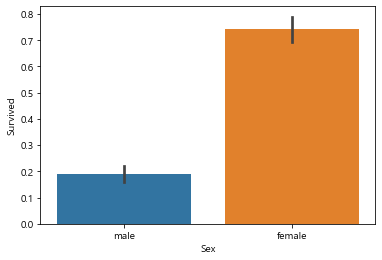

In [35]:
## 그래프 확인
sns.barplot(x='Sex', y='Survived', data=titanic_df)

참고 
* 검은 선
* 오차막대 (error bar) : 부트 스트랩 신뢰구간(Bootstrap confidence intervals)
* 기본값 :  95(5프로의 오차범위)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

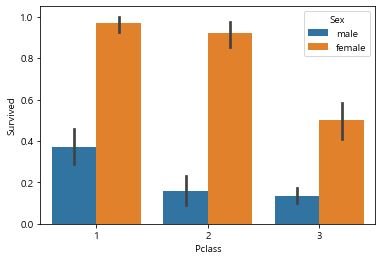

In [39]:
# 객식 등급별/성별 생존 확률 - bar 그래프 이용

sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df) # hue : 한번더 기준을 가지고 구별할 때 사용

# 여성 : 1, 2등실에 따른 생존 확률의 차이는 크지 않으나
#         3등실의 경우 생존 확률이 상대적으로 떨어짐
# 남성 : 2,3등실 보다 1등실 생존 확률이 월등히 높음

## 데이터 전처리 : 구간화(binning)


### 연령대에 따른 생존자수 분포
- 연령은 수치형 변수이므로 범주형으로 구간화(binning)

In [40]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S


**연령별 생존 확률 확인**
- Age 변수가 연속형이어어서 값의 종류가 많아서 범위 별로 분류해 카테고리 값을 할당 -> 새로운 컬럼

In [42]:
## 입력 Age에 따라 구분 값을 반환하는 함수

def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'        # -1 이하 오류 값
    elif age <= 5: cat = 'Baby'          # 0~5세 
    elif age <= 12: cat = 'Child'        # 6~12세
    elif age <= 18: cat = 'Teenager'     # 13~18세
    elif age <= 25: cat = 'Student'      # 19~25세
    elif age <= 35: cat = 'Young Adult'  # 26~35
    elif age <= 60: cat = 'Adult'        # 36~60
    else : cat = 'Elderly'               # 61세 이상
    
    return cat

In [45]:
titanic_df['Age'].head()
## cut을 통해 하기의 컬럼에 추가

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [52]:
## age_cut 컬럼 생성 : 연령대 데이터 가공
titanic_df['Age_cut'] = titanic_df['Age'].apply(lambda x:get_category(x))

In [50]:
## 작동 됨 확인필요
#titanic_df['Age_cut'] = titanic_df['Age'].apply(get_category)

In [53]:
titanic_df['Age_cut']

0          Student
1            Adult
2      Young Adult
3      Young Adult
4      Young Adult
          ...     
886    Young Adult
887        Student
888    Young Adult
889    Young Adult
890    Young Adult
Name: Age_cut, Length: 891, dtype: object

In [55]:
#X축의 값을 순차적으로 표시하기 위한 설정 
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

<AxesSubplot:xlabel='Age_cut', ylabel='Survived'>

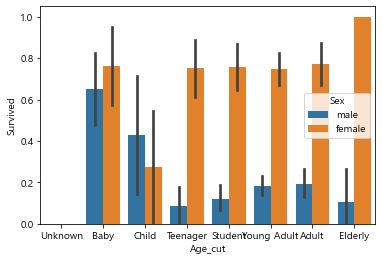

In [56]:
sns.barplot(x='Age_cut', y = 'Survived', hue='Sex', data=titanic_df, order=group_names)

In [60]:
titanic_df.drop('Age_cut', axis=1, inplace=True) 
# Age_cut 컬럼은 Age에 기인하므로 상관성이 높게 나옴 - Age 사용 Age_cut을 삭제

### 데이터 전처리 : 인코딩

### 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환
* 인코딩 : 사이킷런의 LabelEncoder 클래스 이용해서 레이블 인코딩 적용
* 0 ~ (카테고리 유형수 -1) 숫자 값으로 변환
* fit() / transform() 메서드 사용


In [57]:
from sklearn import preprocessing

## 레이블 인코딩 함수
def encode_features(dataDf):
    # 문자열 카테고리 피처
    features = ['Cabin', 'Sex', 'Embarked']
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDf[feature])
        dataDf[feature] = le.transform(dataDf[feature])
        
        
    return dataDf
        
        
        

In [61]:
titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


## 데이터 전처리 : 삭제
- PassengerId, Name, Ticket 변수 삭제
- drop(labels=None, axis=0, inplace=False) 함수 사용

In [62]:
## 불필요한 변수 제거 : 도메인에 기반함
titanic_df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [63]:
titanic_df.head() #Survived 종속변수(y)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,7,3
1,1,1,0,38.0,1,0,71.2833,2,0
2,1,3,0,26.0,0,0,7.9250,7,3
3,1,1,0,35.0,1,0,53.1000,2,3
4,0,3,1,35.0,0,0,8.0500,7,3


#### 뒤 수업에서 재사용하기 위해 가공내용을 정리해서 함수로 생성

In [65]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1] # 첫문자만 추출
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

---

## 생존자 예측 프로세스

### 1단계. 데이터 로딩
- 피처 데이터셋, 레이블 데이터셋 추출

In [67]:
titanic_df = pd.read_csv('./data/titanic_train.csv')
# 결정값
y_titanic_df = titanic_df['Survived']
# 학습 데이터 세트
# 결정값으로 사용할 'Survived' 칼럼 제외
X_titanic_df= titanic_df.drop('Survived',axis=1)


### 2단계. 데이터 전처리
- 피처 데이터 세트에 transform_features()를 적용해 데이터 가공

In [68]:
# 데이터 전처리 함수 호출
X_titanic_df = transform_features(X_titanic_df)
X_titanic_df.head(5)
# 생존자 예측을 수행할 피처 데이터 세트 완성

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,7,3
1,1,0,38.0,1,0,71.2833,2,0
2,3,0,26.0,0,0,7.9250,7,3
3,1,0,35.0,1,0,53.1000,2,3
4,3,1,35.0,0,0,8.0500,7,3


### 3단계. Data Split : 학습 데이터/테스트 데이터

In [69]:
# 학습 / 테스트 데이터 세트 분리
# 테스트 데이터 세트 : 20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=11)

### 4단계. 분류 알고리즘을 적용한 학습/예측/평가

* 3개의 ML 알고리즘 수행  
     - 결정 트리, 랜덤 포레스트, 로지스틱 회귀(분류)
* 이 3개의 알고리즘으로 예측 수행하고 
* 교차 검증으로 평가

사이킷런 클래스
* 결정 트리 : DecisionTreeClassifier
* 랜덤 포레스트 : RandomForestClassifier
* 로지스틱 회귀 : LogisticRegression
    
train_test_split()으로 분리한 학습 데이터와 테스트 데이터를 기반으로
* 머신러닝 모델을 학습하고(fit), 예측 수행(predict)
* 예측 성능 평가 :  정확도 (accuracy_score() 사용)

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [71]:
# 결정트리, random forest, 로지스틱회귀 모델 사용을 위해 클래스 인스턴스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

In [75]:
# DecisionTreeClassifier 학습/예측 평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))


# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))


# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier(random_state=11)

DecisionTreeClassifier 정확도: 0.7877


RandomForestClassifier(random_state=11)

RandomForestClassifier 정확도:0.8547


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

LogisticRegression 정확도: 0.8492


### 5단계. 교차 검증을 통한 모델 성능 향상
: 결정 트리 모델 좀 더 평가
* 사이킷런 model_selection 패키지의 
    - KFold 클래스, cross_val_score(), GridSearchCV 클래스 사용

In [76]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측 결과 저장을 위한  리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차 검증 수행. enumerate(), iter_count(자동 증가) 사용
    for iter_count , (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산 
        clf.fit(X_train, y_train) 
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))     
    
    # 5개 fold에서의 평균 정확도 계산. 
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score))


In [80]:
# exec_kfold() 호출
exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


### 6단계. 하이퍼파라미터 튜닝

In [85]:
# GridSearchCV 클래스를 이용해 하이퍼 파리미터를 튜닝

# DecisionTreeClassifier의 최적 하이퍼 파라미터를 찾고 에측 성능 측정

# CV : 5개의 폴드 세트 지정
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 : max_depth, min_samples_split, min_samples_leaf
parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=11),
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [1, 5, 8],
                         'min_samples_split': [2, 3, 5]},
             scoring='accuracy')

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715
